In [1]:
import numpy as np
#This following is so that this will work with Latex, see
#http://bkanuka.com/articles/native-latex-plots/
import matplotlib as mpl
mpl.use('pgf')

In [2]:
def figsize(scale):                                 # I think scale is the size you want it on the page
    fig_width_pt = 433.62001                        # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.0                        # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*golden_mean              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size

pgf_with_lualatex = {                      # Setup matplotlib to use latex for output
    "pgf.texsystem": "lualatex",           # Change this if using xetex or luatex
    "text.usetex": True,                   # Use LaTeX to write all text
    #Fonts
    "font.family": "serif",                # Get from the pdf font function on the doc
    "font.serif": "Computer Modern Roman",      
    "font.sans-serif": "Computer Modern Sans serif",
    "font.monospace": [], # Blank entries should cause plots to inherit fonts from the document
    #Text size
    "font.size": 11,# Document default is 11pt font.
    #"text.fontsize": 11,
    "axes.labelsize": 11,
    "legend.fontsize": 8,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    ##Axis
    #"axes.labelpad": 2,     # space between label and axis 
    "figure.figsize": figsize(1.0),     # default fig size of 1.0 textwidth
    #Packages
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        r"\usepackage{amsmath}",  #need to add math or the ^ won't work
        r"\usepackage{amssymb}"]
    }

mpl.rcParams.update(pgf_with_lualatex)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import uproot
from scipy.optimize import curve_fit
from scipy.integrate import quad
from scipy.special import gamma
from matplotlib.ticker import AutoMinorLocator

In [4]:
print('Requirements:')
print('     Numpy:'+np.__version__)
print('Matplotlib:'+mpl.__version__)
print('    Pandas:'+pd.__version__)
print('   Seaborn:'+sns.__version__)

Requirements:
     Numpy:1.14.3
Matplotlib:2.1.1
    Pandas:0.22.0
   Seaborn:0.8.1


In [5]:
%matplotlib inline
plt.style.use('seaborn-ticks')
sns.set_palette("muted")

In [6]:
#nuclei_data = pd.read_fwf('data/nuclear_wallet_cards_z_1_83_stable.csv', widths=[11,11,11,11,11,11,11])
nuclei_data = pd.read_csv('data/nuclei_stable_z_ordered.csv', index_col=0)

In [7]:
#nuclei_data.sort_values('Z').to_csv('data/nuclei_stable_z_ordered.csv')

In [8]:
nuclei_data.tail()

,A,Z,N,JPi,T1/2,Abund.,Unc
228,203,81,122,1/2+,STABLE,29.52%,0.001
231,207,82,125,1/2-,STABLE,22.10%,0.100
232,208,82,126,0,STABLE,52.40%,0.100
230,206,82,124,0,STABLE,24.10%,0.100
233,209,83,126,9/2-,STABLE,100.00%,NaN


In [9]:
# Clean and convert to numerical values
nuclei_data['Abund.'] = nuclei_data['Abund.'].str.replace('%','').apply(pd.to_numeric)
nuclei_data['Spin'] = nuclei_data['JPi'].str.replace('+','').str.replace('-','').apply(pd.to_numeric, errors='coerce')

In [10]:
#test = pd.read_csv('data/Asymmetry_vs_A_noerr.txt', sep=' ', names=['A', 'Asym'])
measured = pd.read_csv('data/measured_vsA_scaled.csv')

In [11]:
measured

,A,asym,asym_err,label
0,1,-3.38,0.78,HAPPEX $^{1}$H
1,4,-7.68,0.77,HAPPEX $^{4}$He
2,12,-10.10,0.60,PREX $^{12}$C
3,208,0.46,0.41,PREX $^{208}$Pb


In [12]:
markers=['o', '8', 'v', '^']
colors=['dull pink', 'dull orange', 'dull brown', 'dull red']

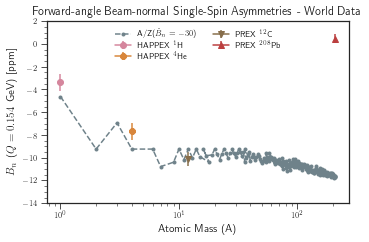

In [13]:
fig, ax = plt.subplots(figsize=figsize(0.9))
ax.plot(nuclei_data.A,
        (-30.0*0.154)*nuclei_data.A/nuclei_data.Z,
        ls='--',
        marker='.',
        color=sns.xkcd_rgb['steel grey'], label='A/Z($\hat{B}_{n} = -30$)')
for i in measured.index:
    ax.errorbar(measured.A[i],
                measured.asym[i],
                yerr=measured.asym_err[i],
                marker=markers[i],
                color=sns.xkcd_rgb[colors[i]],
                label=measured.label[i])
ax.set_xscale('log')
ax.set_ylim(-14.0, 2.0)
ax.set_xlabel('Atomic Mass (A)')
ax.set_ylabel('$B_{n}$ ($Q = 0.154$ GeV) [ppm]')
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.legend(loc='upper center', ncol=2)
ax.set_title('Forward-angle Beam-normal Single-Spin Asymmetries - World Data')
plt.savefig('plots/bnssa_world_data.png', bbox_inches='tight')
plt.savefig('plots/bnssa_world_data.pdf', bbox_inches='tight')
plt.savefig('plots/bnssa_world_data.pgf', bbox_inches='tight')
plt.show()

In [15]:
qweak = pd.read_csv('data/qweak_bnssa.csv')

In [16]:
qweak

,A,asym,asym_err,label
0,1,-5.215,0.146,Qweak $^{1}$H
1,12,-10.412,1.948,Qweak $^{12}$C
2,27,-16.322,2.679,Qweak $^{27}$Al


In [17]:
qmarkers = ['s', 'P', 'd']
qcolors = ['dull purple', 'dull blue', 'dull green']

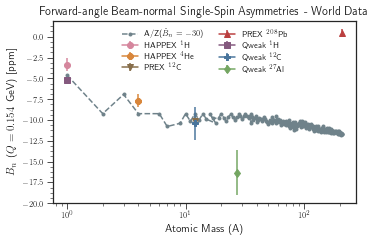

In [18]:
fig, ax = plt.subplots(figsize=figsize(0.9))
ax.plot(nuclei_data.A,
        (-30.0*0.154)*nuclei_data.A/nuclei_data.Z,
        ls='--',
        marker='.',
        color=sns.xkcd_rgb['steel grey'], label='A/Z($\hat{B}_{n} = -30$)', zorder=1)
for i in measured.index:
    ax.errorbar(measured.A[i],
                measured.asym[i],
                yerr=measured.asym_err[i],
                marker=markers[i],
                color=sns.xkcd_rgb[colors[i]],
                label=measured.label[i])
    
for j in qweak.index:
    ax.errorbar(qweak.A[j],
                qweak.asym[j],
                yerr=qweak.asym_err[j],
                marker=qmarkers[j],
                color=sns.xkcd_rgb[qcolors[j]],
                label=qweak.label[j])
#Test
#ax.errorbar(27, -16.273, yerr=1.883, ls='None', marker='d', color='k')


ax.set_xscale('log')
#ax.set_ylim(-14.0, 2.0)
ax.set_xlabel('Atomic Mass (A)')
ax.set_ylabel('$B_{n}$ ($Q = 0.154$ GeV) [ppm]')
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.legend(loc='upper center', ncol=2)
ax.set_title('Forward-angle Beam-normal Single-Spin Asymmetries - World Data')
plt.savefig('plots/bnssa_world_data_qweak.png', bbox_inches='tight')
plt.savefig('plots/bnssa_world_data_qweak.pdf', bbox_inches='tight')
plt.savefig('plots/bnssa_world_data_qweak.pgf', bbox_inches='tight')
plt.show()